In [46]:
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
ds = xr.open_dataset("../data/critical_3d.nc")
ds

<xarray.Dataset>
Dimensions:  (α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
Data variables:
    match    (α, β, γ) float64 ...
    Q        (α, β, γ) float64 ...
    mode     (α, β, γ) float64 ...

In [24]:
modes = np.int64(np.unique(ds['mode'].values))

In [75]:
modal = xr.Dataset(
    coords=ds.coords
)
modal = modal.assign_coords({'mode': modes})

modal['match'] = xr.DataArray(
    da.zeros(tuple(modal.dims.values()), chunks=(1,) + tuple(modal.dims.values())[1:]),
    coords=modal.coords,
    dims=list(modal.dims.keys())
)

modal['Q'] = xr.DataArray(
    da.zeros(tuple(modal.dims.values()), chunks=(1,) + tuple(modal.dims.values())[1:]),
    coords=modal.coords,
    dims=list(modal.dims.keys())
)

modal

<xarray.Dataset>
Dimensions:  (mode: 18, α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
Data variables:
    match    (mode, α, β, γ) float64 dask.array<chunksize=(1, 400, 400, 400), meta=np.ndarray>
    Q        (mode, α, β, γ) float64 dask.array<chunksize=(1, 400, 400, 400), meta=np.ndarray>

In [76]:
for mode in modes:
    print(mode, end=', ')
    modal['match'].sel(mode=mode).values = ds['match'].where(ds['mode'] == mode).values
    modal['Q'].sel(mode=mode).values = ds['Q'].where(ds['mode'] == mode).values
modal

<xarray.Dataset>
Dimensions:  (mode: 18, α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
Data variables:
    match    (mode, α, β, γ) float64 dask.array<chunksize=(1, 400, 400, 400), meta=np.ndarray>
    Q        (mode, α, β, γ) float64 dask.array<chunksize=(1, 400, 400, 400), meta=np.ndarray>

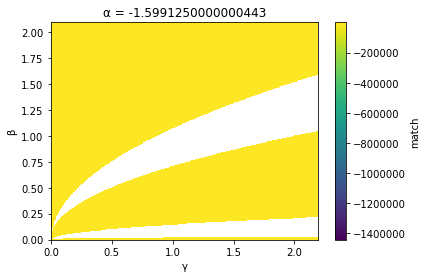

In [88]:
ds['match'].where(ds['mode'] == 1).sel(α=-1.6, method='nearest').plot()

In [74]:
ds.where(ds['mode'] == mode)

<xarray.Dataset>
Dimensions:  (α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
Data variables:
    match    (α, β, γ) float64 0.0 nan nan nan nan nan ... nan nan nan nan nan
    Q        (α, β, γ) float64 0.0 nan nan nan nan nan ... nan nan nan nan nan
    mode     (α, β, γ) float64 0.0 nan nan nan nan nan ... nan nan nan nan nan

In [19]:
mode0 = ds.where(ds['mode'] == 0.)

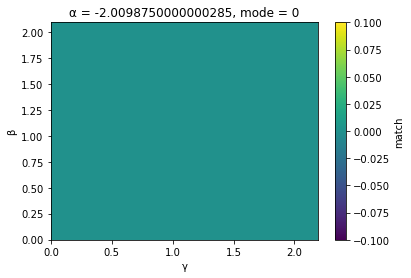

In [80]:
q = modal['match'].sel(mode=0, α=-2.010268982892298, method='nearest').plot()
#q.set_clim([0.,2.])

In [82]:
modal['match'].sel(mode=0, α=-2.010268982892298, method='nearest').values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])